In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


import os

In [2]:
df = pd.read_csv("./data/wine/wine.csv", sep=",")

In [3]:
dff = df

In [4]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

normalized_df.to_csv('./data/wine/normalize.csv', index=False)

In [5]:
df = pd.read_csv("./data/wine/normalize.csv", sep=",")
del df['Class']
del dff['Class']

In [6]:
df

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

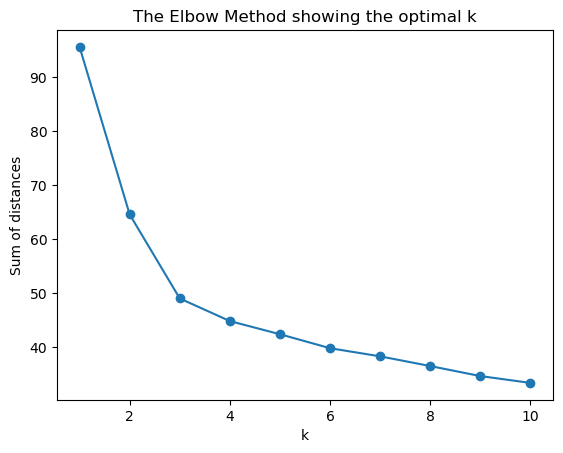

In [7]:
from sklearn.cluster import KMeans

K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
dff['cluster'] = model.labels_
dff.groupby('cluster').mean()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
cluster,,,,,,,,,,,,,
0,12.213226,1.938710,2.244355,20.298387,92.790323,2.293871,2.152581,0.348226,1.669839,3.011452,1.062419,2.877903,497.274194
1,13.099818,3.160909,2.407455,21.043636,98.654545,1.689818,0.847818,0.457818,1.133636,6.936545,0.716836,1.709273,624.854545
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


In [10]:
dff.groupby('cluster').max()

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
cluster,,,,,,,,,,,,,
0,13.86,5.80,3.23,28.5,151,3.52,5.08,0.66,3.58,6.0,1.71,3.69,886
1,14.34,5.65,2.86,27.0,123,2.80,1.59,0.63,2.70,13.0,1.25,2.47,880
2,14.83,4.04,3.22,30.0,162,3.88,3.93,0.50,3.28,8.9,1.31,4.00,1680


In [11]:
dff.groupby('cluster').min()

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
cluster,,,,,,,,,,,,,
0,11.03,0.74,1.36,10.6,70,1.38,0.57,0.13,0.42,1.28,0.69,1.82,278
1,12.20,0.94,1.98,16.0,80,0.98,0.34,0.17,0.41,3.05,0.48,1.27,372
2,12.47,1.35,2.04,11.2,89,2.20,2.19,0.17,1.25,2.60,0.82,2.51,680


: 

В результате у нас получилось 3 кластера, у которых можно выявить следующие особенности:

0:самое низкое содержание алкоголя(12.213226) и магния(92.790323), умеренное содержание нефлаваноидных фенолов(0.348226) и умеренная интенсивность цвета(3.011452), самое низкое содержание паролина(497.274194).

1:среднее содержание алкоголя(13.099818), высокое содержание яблочной кислоты(3.160909), среднее содержание магния(98.654545).

2: обладает наивысшим содержанием алкоголя(3.711475), магния(107.786885), пролинов(1110.639344) и протеинов(3.154754). При этом самое маленькое содержание щелочности осадка(17.281967).

Таким образом, первый кластер содержит наименьшее количество добавок и крепости, а третий наоборот, полон добавок и очень крепкий .

____________________________________